In [1]:
import numpy as np

def dVm_dt_max(time, values, info):
    
    dt = time[1]-time[0]
    max_dV = (values[1]-values[0])/dt
    for i in range((np.shape(values)[0])-2):
        temp = (values[i+2]-values[i+1])/dt
        #print(temp)
        #print()
        if(temp > max_dV):
            max_dV = temp
    
    values_feature = max_dV
    
    #return time_feature, values_feature
    return None, values_feature

def V_max(time, values, info):
    
    values_feature = np.max(values)
    
    #return time_feature, values_feature
    return None, values_feature

def APD_50(time, values, info): 
    
    delta_V = np.max(values) - values[0]
    delta_V_50 = np.max(values) - delta_V*0.5
    delta_time_50 = time[-1] # Nel caso in cui non lo raggiunga (da sistemare, anche i parametri)
    pol=10 # (better to fix) just to be sure i already passed zero during polarization

    for i in range((np.shape(values)[0])-10):
        if(values[i+pol]<=delta_V_50):
            delta_time_50 = time[i+pol]
            break
            
    values_feature = delta_time_50   
            
    return None, values_feature

def APD_90(time, values, info): 
    
    delta_V = np.max(values) - values[0]
    delta_V_90 = np.max(values) - delta_V*0.9
    delta_time_90 = time[-1]
    pol=10 # (better to fix) just to be sure i already passed zero during polarization

    for i in range((np.shape(values)[0])-10):
        if(values[i+pol]<=delta_V_90):
            delta_time_90 = time[i+pol]
            break
    
    values_feature = delta_time_90
            
    return None, values_feature

def V_20(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.2 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def V_40(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.4 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def V_60(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.6 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def V_80(time, values, info):
    
    toi = APD_90(time, values, info)[1]*0.8 #time of interest
    pol=10 # (better to fix) just to be sure i already passed zero during polarization
    values_feature=0
    
    for i in range((np.shape(values)[0])-10):
        if(time[i+pol]>=toi):
            values_feature = values[i+pol]
            break
    
    #return time_feature, values_feature
    return None, values_feature

def rest_Vm(time, values, info):
    
    # Da modificare quando si capisce e si modifica l'intervallo di tempo su cui operare
    values_feature = values[-1] # ultimo valore per ora
    
    #return time_feature, values_feature
    return None, values_feature

def Ca2_max(time, values, info):
    
    return None, values_feature

def get_all_keys_in_order(list_of_dicts):
    ordered_keys = []
    for dict_ in list_of_dicts:
        for key in dict_:
            if key not in ordered_keys:
                ordered_keys.append(key)
    return ordered_keys

In [2]:
import uncertainpy as un
import chaospy as cp


from hodgkin_huxley import HodgkinHuxley

# Define a parameter list
parameter_list = [["V_rest", -65, None],
                  ["Cm", 1, cp.Uniform(0.8, 1.5)],
                  ["gbar_Na", 120, cp.Uniform(80, 160)],
                  ["gbar_K", 36, cp.Uniform(26, 49)],
                  ["gbar_L", 0.3, cp.Uniform(0.13, 0.5)],
                  ["E_Na", 50, cp.Uniform(30, 54)],
                  ["E_K", -77, cp.Uniform(-74, -79)],
                  ["E_l", -50.613, cp.Uniform(-61, -43)]]

# Create the parameters using that parameter list
parameters = un.Parameters(parameter_list)

# Set all parameters to have a uniform distribution
# within a 50% interval around their fixed value
parameters.set_all_distributions(un.uniform(0.5))

# Initialize the model
model = HodgkinHuxley()

# Initialize features
#features = un.SpikingFeatures()
feature_functions = [dVm_dt_max, V_max, V_20, V_40, V_60, V_80, APD_50, APD_90, rest_Vm]

features = un.Features(
    new_features=feature_functions,
    features_to_run="all"
)

# Perform the uncertainty quantification
UQ = un.UncertaintyQuantification(model=model,
                                  parameters=parameters,
                                  features=features)
data = UQ.quantify()



ciao2


/Users/davideserra/opt/anaconda3/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)
Running model: 100%|█████████████████████| 50000/50000 [01:28<00:00, 562.31it/s]


Saving data as: data/HodgkinHuxley.h5


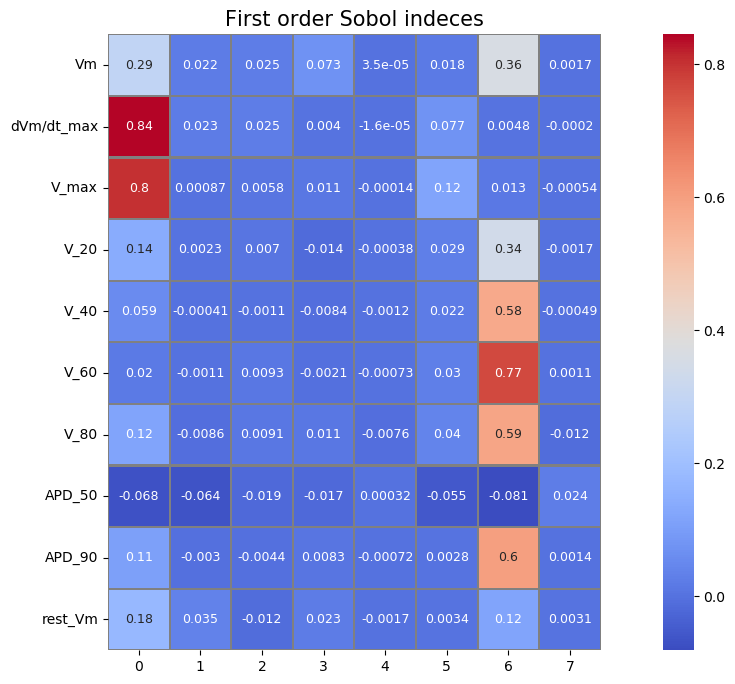

In [4]:
import pandas as pd
import numpy as np

def get_all_keys_in_order(list_of_dicts):
    ordered_keys = []
    for dict_ in list_of_dicts:
        for key in dict_:
            if key not in ordered_keys:
                ordered_keys.append(key)
    return ordered_keys


df = pd.DataFrame({'Vm':data["HodgkinHuxley"].sobol_first_average,
                   'dVm/dt_max':data["dVm_dt_max"].sobol_first_average, 
                   'V_max':data["V_max"].sobol_first,
                   'V_20':data["V_20"].sobol_first,
                   'V_40':data["V_40"].sobol_first,
                   'V_60':data["V_60"].sobol_first,
                   'V_80':data["V_80"].sobol_first,
                   'APD_50':data["APD_50"].sobol_first, 
                   'APD_90':data["APD_90"].sobol_first,
                   'rest_Vm':data["rest_Vm"].sobol_first})
df = df.transpose()
#df.columns = get_all_keys_in_order([parameter_list])

import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(16, 8))
mask = np.array(abs(df) < 0.1)

ax = sns.heatmap(df, linewidth=0.8, annot=True, square=True, ax=ax, 
                 cmap='coolwarm', annot_kws={"fontsize": 9}, #mask=mask,
                 linecolor='grey')
ax.set_title("First order Sobol indeces", fontsize=15)

plt.show()

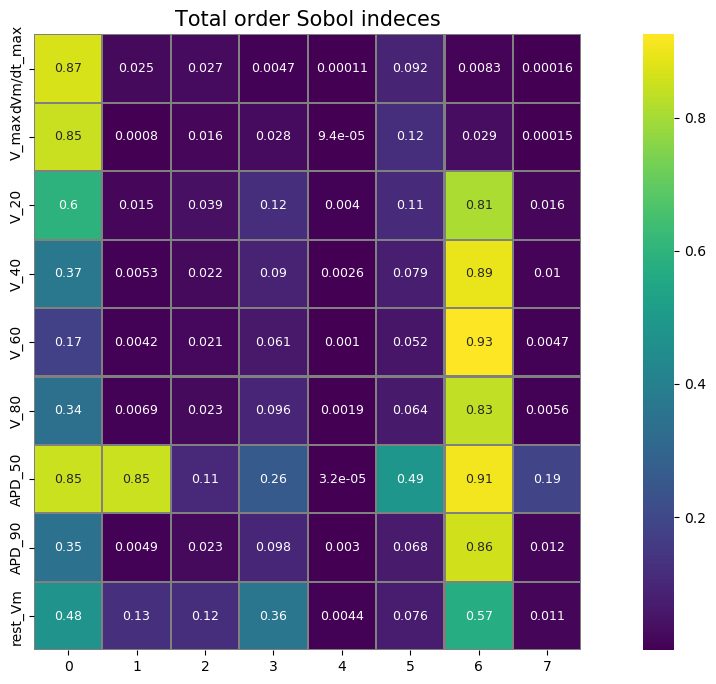

In [7]:
### SOBOL TOTAL ###

import pandas as pd
matrix = np.array([data["V_max"].sobol_first, data["dVm_dt_max"].sobol_first])
matrix

df = pd.DataFrame({'dVm/dt_max':data["dVm_dt_max"].sobol_total, 
                   'V_max':data["V_max"].sobol_total,
                   'V_20':data["V_20"].sobol_total,
                   'V_40':data["V_40"].sobol_total,
                   'V_60':data["V_60"].sobol_total,
                   'V_80':data["V_80"].sobol_total,
                   'APD_50':data["APD_50"].sobol_total, 
                   'APD_90':data["APD_90"].sobol_total,
                   'rest_Vm':data["rest_Vm"].sobol_total})
df = df.transpose()
#df.columns = get_all_keys_in_order([parameter_list])

import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(figsize=(16, 8))
mask = np.array(abs(df) < 0.05)

ax = sns.heatmap(df, linewidth=0.8, annot=True, square=True, ax=ax, 
                 cmap='viridis', annot_kws={"fontsize": 9}, #mask=mask,
                 linecolor='grey')
ax.set_title("Total order Sobol indeces", fontsize=15)

plt.show()